# DOM
- Document Object Model
- HTMP 문서의 모든 요소에 접근하는 방법을 정의한 API
- 이를 만들기 위해 중간에 Parser(xml 등) 있어야 한다
    - 파싱((syntactic) parsing)은 일련의 문자열을 의미있는 토큰(token)으로 분해하고 이들로 이루어진 파스 트리(parse tree)를 만드는 과정을 말한다.
- 문서 형태로 저장되는 것들 : HTML, JS, CSS 총 3가지
- DOM 객체는 텍스트와 이미지, 하이퍼링크 등의 각 문서 element를 나타낸다
- 자바스크립트 코드에서는 동적인 HTML을 만들어내기 위해 DOM 객체에 접근해서 조작할 수 있다

**우리가 관심있는 것은 내용이 들어있는 Body**

# BeautifulSoup

- string, byte 형태가 들어오면 이들을 바탕으로 dom tree를 만들어 주고 빠르게 접근할 수 있는 방법을 제공해준다
- HTML/XML Parser이기 때문에 HTML/XML 문자열에서 원하는 태그 정보를 뽑아준다
- python library for pulling data out of HTML and XML files
- provide idomatic ways of navigating, searching, and modifying DOM
- saves programmers hours and days

In [1]:
!pip install bs4
from bs4 import BeautifulSoup

### 파서 종류
1. lmxl
    - 어떤 parser 쓰느냐에 따라 속도 달라진다
    - 가장 속도 빠르다

2. html.parser
    - 몇몇 안되는 경우가 있다
    - 이럴 때 dom의 파서를 바꿔준다 
    - 속도도 준수하다
    
3. 정규식
    - 다 안될 경우에는 정규식을 사용한다
    - 가장 확실한 방법(어렵다 ㅠㅠ)
    
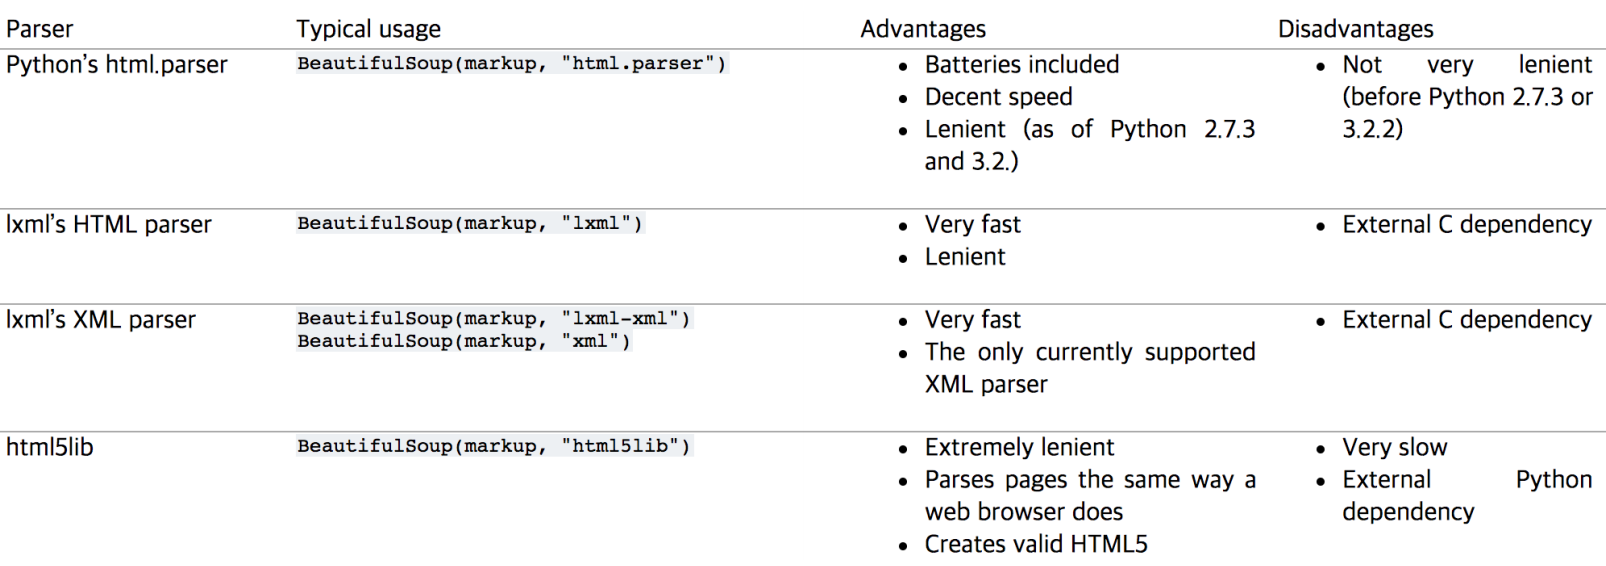

### html의 유의할 점
- every open tag must expicity be closed
- empty elements in XML are written closed
- child markup must nest complemently whit parent markup

#### [예제]

In [2]:
html = """
<html>
    <head></head>
    <body>
        <div>
            <p>
        <a>go to page</a>
            </p>
        </div>
    </body>
"""

In [3]:
dom = BeautifulSoup(html, 'lxml')

In [6]:
# 계속 아이들(children)을 찾아 들어갈 수 있다
# 관계가 설정된 것일 뿐 독립적이다

In [4]:
dom.html.body.div.p

<p>
<a>go to page</a>
</p>

In [5]:
dom.html.body.div.p.a

<a>go to page</a>

In [7]:
dom.a

<a>go to page</a>

#### [예제 1]

In [97]:
html = """
<html>
<head></head>
<body>
	<div>
		<p>
			<a>go to page</a>
			<a>go to page2</a>
		</p>
	</div>
</body>
"""

In [9]:
dom1 = BeautifulSoup(html1, 'lxml')

In [11]:
dom1.a #첫 번쨰 값이 나오는데, 두 번째 값을 얻고 싶다면 어떻게 해야 할까?

<a>go to page</a>

#### [예제 2]

In [98]:
html2 = """
<html>
<head></head>
<body>
	<div id = "result">
		<p class = "row">
			<a class = "red">go to page</a>
			<a class = "blue">go to page2</a>
		</p>
	</div>
</body>
"""

In [13]:
dom2 = BeautifulSoup(html2, 'lxml')

In [14]:
dom2.a

<a class="red">go to page</a>

In [15]:
dom2.p.children

In [16]:
for i in dom2:
    print(i)

<html>
<head></head>
<body>
<div id="result">
<p class="row">
<a class="red">go to page</a>
<a class="blue">go to page2</a>
</p>
</div>
</body>
</html>


html 파싱을 할 때, 특성이 명확하지 않으면 부모로 올라가서 찾는다. 

body까지 올라가야 하는 경우에는 how to solve?

In [18]:
dom2.div["id"] # 이런 식으로 <div id = "result">를 나타낸다

'result'

In [19]:
type(dom2.div["id"])

str

In [21]:
dom2.a["class"]

['red']

In [20]:
type(dom2.a["class"])

list

In [30]:
for _ in dom2.p.children:
    print(_)



<a class="red">go to page</a>


<a class="blue">go to page2</a>




In [28]:
for _ in dom2.p.children:
    print(type(_))

<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>


In [29]:
for _ in dom2.p.children:
    print(type(_),_)
# 앞에 껀 string, 뒤의 것은 element

<class 'bs4.element.NavigableString'> 

<class 'bs4.element.Tag'> <a class="red">go to page</a>
<class 'bs4.element.NavigableString'> 

<class 'bs4.element.Tag'> <a class="blue">go to page2</a>
<class 'bs4.element.NavigableString'> 



In [31]:
dom2.div.attrs

{'id': 'result'}

In [41]:
[x for x in dom2.p.children]

['\n',
 <a class="red">go to page</a>,
 '\n',
 <a class="blue">go to page2</a>,
 '\n']

In [35]:
[x for x in dom2.p.children][1].attrs

{'class': ['red']}

In [43]:
[x for x in dom2.p.children][3].attrs 

{'class': ['blue']}

In [60]:
dom2.a["class"][1] # blue 아직 못 찾겠다

IndexError: list index out of range

# 쓰이는 함수들

## find / find_all
- find는 하나만 찾아주고 find_all은 모두 찾아준다
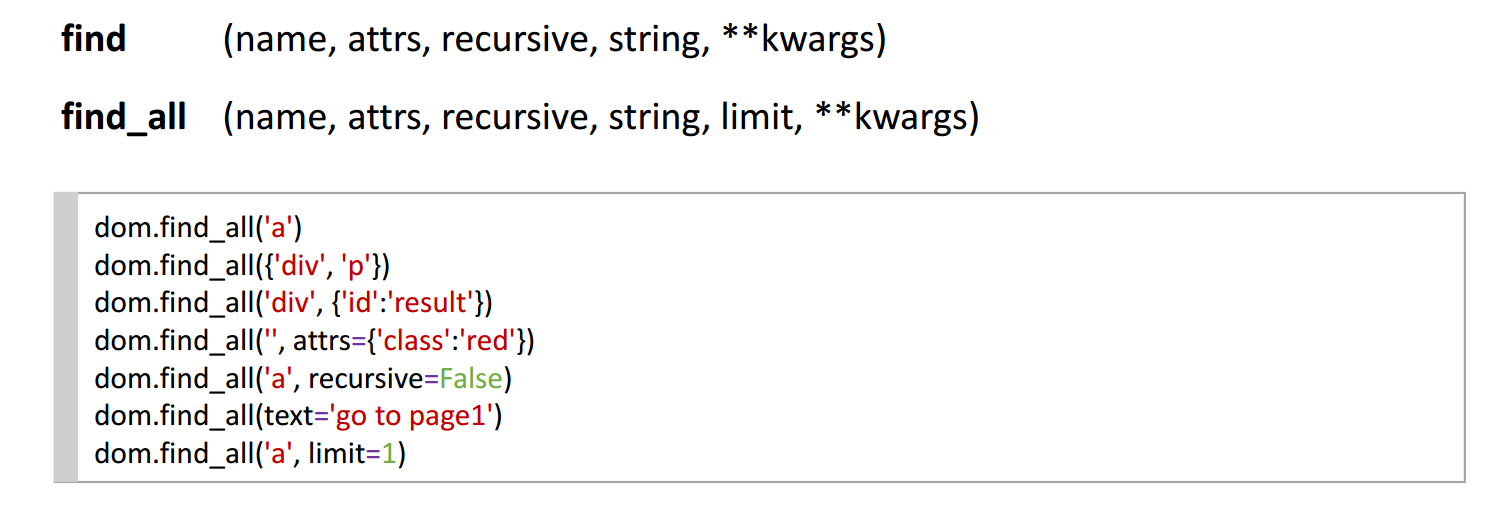

### 찾는 방법

1. 태그 이름
2. attribute
3. 본문 내용에 있는 텍스트

In [49]:
dom2.find_all('a')

[<a class="red">go to page</a>, <a class="blue">go to page2</a>]

In [52]:
dom2.find_all('a','blue') # 찾았다 ㅎㅎ

[<a class="blue">go to page2</a>]

In [51]:
dom2.find_all('', attrs= {'class':'red'})

[<a class="red">go to page</a>]

In [54]:
dom2.find_all('', attrs= {'class': 'blue'})

[<a class="blue">go to page2</a>]

In [56]:
dom2.find_all('div', {'id' : 'result'})

[<div id="result">
 <p class="row">
 <a class="red">go to page</a>
 <a class="blue">go to page2</a>
 </p>
 </div>]

In [57]:
dom2.find_all('a', limit = 1)

[<a class="red">go to page</a>]

In [58]:
dom2.find_all('a', limit = 2)

[<a class="red">go to page</a>, <a class="blue">go to page2</a>]

In [59]:
dom2.find_all('a', recursive = False) # 더 이상 진행 x, 자식 요소만 찾겠다

[]

recursive 매개변수는 불리언입니다. 문서에서 얼마나 깊이 찾아 들어가고 싶은지를 지정합니다. recursive가 True이면 findAll 함수는 매개변수에 일치하는 태그를 찾아 자식, 자식의 자식을 검색합니다. false이면 문서의 최상위 태그만 찾습니다. 기본적으로 findAll은 재귀적으로(recursive가 True) 동작합니다. 일반적으로 이 옵션은 그대로 두는 것이 좋습니다(원하는 것이 무엇인지 정확히 알고 있으며 성능이 중요한 상황이 아니라면).

**[직계 자손만 보고 싶을 때 사용한다]**

## parents, siblings

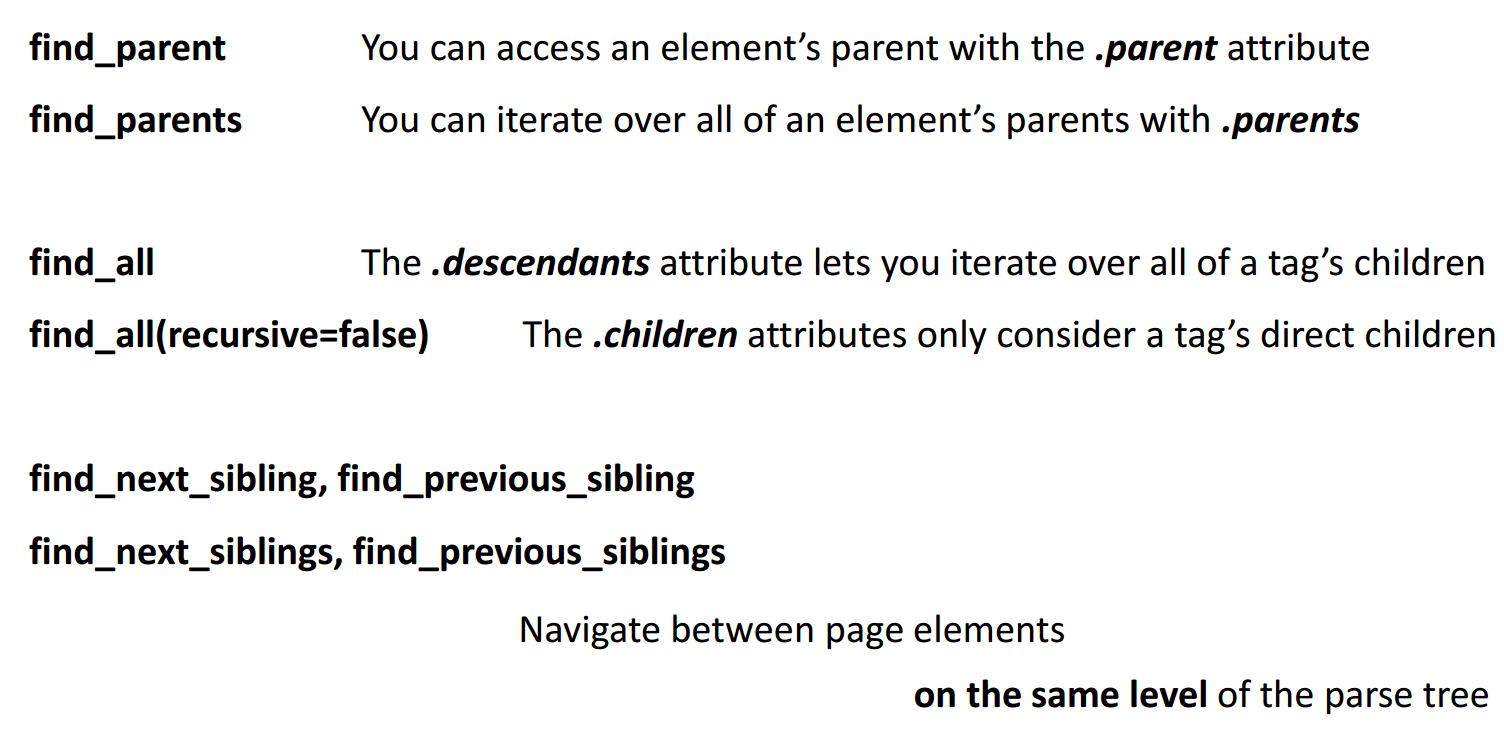

#### [예제 4]

In [99]:
html4 = """
<html>
<head></head>
<body>
	<div id = "result">
		<p class = "row">
			<a class = "red">
				<a></a>
			</a>
			<a class = "bule">go to page 2</a>
		</p>
	</div>
</body>
"""

In [64]:
dom4 = BeautifulSoup(html4, 'lxml')

In [65]:
len(dom4.find_all('a'))

3

In [67]:
dom4.p.a.find_all("a", recursive = False)

[]

In [68]:
[_.find_parent().name for _ in dom4.find_all("a")]

['p', 'p', 'p']

#### [예제 5]

In [100]:
html5 = """
<html>
<head></head>
<body>
	<div id = "result">
		<p class = "row">
			<a class = "red">123</a>
			<a class = "blue">go to page2</a>
			<div><a></a></div>
		</p>
	</div>
</body>
"""

In [70]:
dom5 = BeautifulSoup(html5, 'lxml')

In [71]:
print(dom5.prettify())

<html>
 <head>
 </head>
 <body>
  <div id="result">
   <p class="row">
    <a class="red">
     123
    </a>
    <a class="blue">
     go to page 2
    </a>
   </p>
   <div>
    <a>
    </a>
   </div>
  </div>
 </body>
</html>


In [76]:
dom5.p.find_all("a", recursive = False)

[<a class="red">123</a>, <a class="blue">go to page 2</a>]

#### [예제 6]

### html.parser 이용하기

In [101]:
html6 = """
<html>
<head></head>
<body>
	<div id = "result">
		<p class = "row">
			<a class = "red">123</a>
			<a class = "blue">go to page2</a>
			<div><a></a></div>
		</p>
	</div>
</body>
"""

In [79]:
dom6 = BeautifulSoup(html6, 'html.parser')

In [83]:
len(dom6.p.find_all("a"))

3

In [85]:
len(dom6.p.find_all("a", recursive = False))

2

lxml 안되면 html.parser 사용한다

In [87]:
dom6.div.a

<a class="red">123</a>

In [88]:
dom6.p.div.a

<a></a>

In [89]:
dom6.p.div.a.parent.name

'div'

In [91]:
dom6.p.div.a.find_parent().name

'div'

#### [예제 7]

In [102]:
html7 = """
<html>
<head></head>
<body>
	<div id = "result">
		<p class = "row">
			<a class = "red">go to page 1</a>
			<a class = "blue">go to page 2</a>
			<div><a></a></div>
			<a class = "blue">go to page 2</a>
		</p>
	</div>
</body>
"""

In [93]:
dom7 = BeautifulSoup(html7, 'html.parser')

In [94]:
dom7.p.div.a.find_parent().find_previous_sibling()

<a class="blue">go to page 2</a>

In [96]:
dom7.p.div.a.find_parent().find_previous_siblings()

[<a class="blue">go to page 2</a>, <a class="red">go to page 1</a>]

## [실습]

- 정보를 단순히 열람 : get 
- 정보를 밀어넣는다(로그인 정보 등) : post

In [104]:
import urllib
import json
import requests

#### [예제 8]

### 데이터를 download하기 위한 함수를 정의한 것
### 나도 아직 잘 모르겠다 ㅜ.ㅜ

In [203]:
def download(method,url,param=None, data=None, timeout=1,maxretries=3):
#원래 header도 있어야된다. 위에 정의한거 쓸꺼야  
    try:
        resp=requests.request(method, url, params=param, data=data, headers=headers)
        resp.raise_for_status()#강제로 에러를 내는 코드
    except requests.exceptions.HTTPError as e:
        if 500<= e.response.status_code<600 and maxretries>0:
            time.sleep(timeout)
            print("재시도")
            resp=download(method,url,param,data,timeout,maxretries-1)
        else:
            print(e.response.status_code)
            print(e.response.reason)
    return resp

* 아래의 링크에 있는 데이터를 가져올 것이다
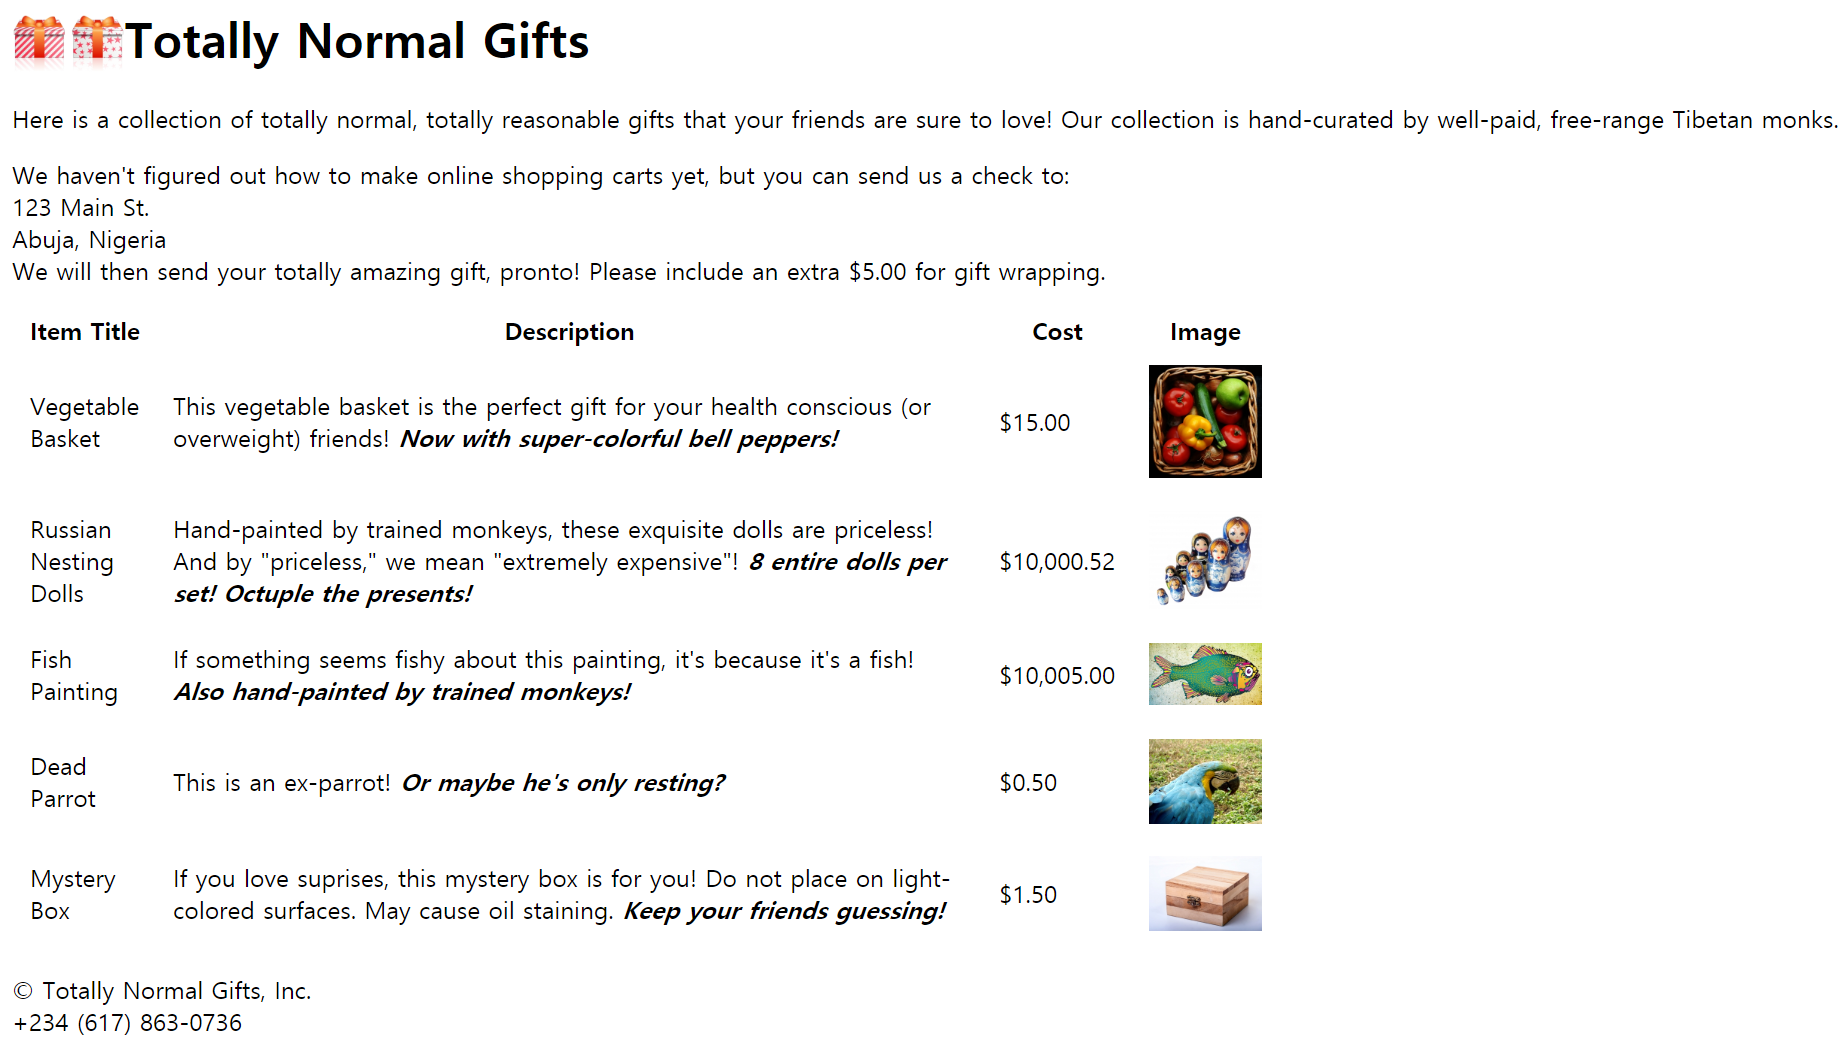

In [204]:
html8 = download("get", "http://pythonscraping.com/pages/page3.html")

In [205]:
html = html8.text # 텍스트화 (맞나?)

**object of type 'Response' has no len() 오류를 막기 위해서 text 해준다** 

**You are getting response.content. But it return response body as bytes (docs). But you should pass str to BeautifulSoup constructor (docs). So you need to use the response.text instead of getting content.**

In [206]:
dom8 = BeautifulSoup(html, 'lxml')

In [207]:
dom8.find_all()

[<html>
 <head>
 <style>
 img{
 	width:75px;
 }
 table{
 	width:50%;
 }
 td{
 	margin:10px;
 	padding:10px;
 }
 .wrapper{
 	width:800px;
 }
 .excitingNote{
 	font-style:italic;
 	font-weight:bold;
 }
 </style>
 </head>
 <body>
 <div id="wrapper">
 <img src="../img/gifts/logo.jpg" style="float:left;"/>
 <h1>Totally Normal Gifts</h1>
 <div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
 hand-curated by well-paid, free-range Tibetan monks.<p>
 We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
 123 Main St.<br/>
 Abuja, Nigeria
 We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>
 <table id="giftList">
 <tr><th>
 Item Title
 </th><th>
 Description
 </th><th>
 Cost
 </th><th>
 Image
 </th></tr>
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift f

In [208]:
dom8.find("div", {"id":"footer"})

<div id="footer">
© Totally Normal Gifts, Inc. <br/>
+234 (617) 863-0736
</div>

In [209]:
footer = dom8.find("div", {"id":"footer"})

In [210]:
[_.name for _ in footer.find_parents()]

['div', 'body', 'html', '[document]']

In [211]:
dom8.body.div.div.find_previous_sibling

<bound method PageElement.find_previous_sibling of <div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
hand-curated by well-paid, free-range Tibetan monks.<p>
We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
123 Main St.<br/>
Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>>

In [212]:
dom8.body.div.p.find_previous_sibling

<bound method PageElement.find_previous_sibling of <p>
We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
123 Main St.<br/>
Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p>>

In [213]:
footer.find_parent().find_all(recursive=False)

[<img src="../img/gifts/logo.jpg" style="float:left;"/>,
 <h1>Totally Normal Gifts</h1>,
 <div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
 hand-curated by well-paid, free-range Tibetan monks.<p>
 We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
 123 Main St.<br/>
 Abuja, Nigeria
 We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>,
 <table id="giftList">
 <tr><th>
 Item Title
 </th><th>
 Description
 </th><th>
 Cost
 </th><th>
 Image
 </th></tr>
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td><td>
 $15.00
 </td><td>
 <img src="../img/gifts/img1.jpg"/>
 </td></tr>
 <tr class="gift" id="gift2"><td>
 Russian 

In [214]:
footer.find_previous_sibling().find_all("tr")[1].find_all("td")[-1].find()

<img src="../img/gifts/img1.jpg"/>

In [215]:
footer.find_parent().find('tr',{"id":"gift4"}).img

<img src="../img/gifts/img4.jpg"/>

In [216]:
footer.find_parent().find('tr',{'id':'gift2'}).img

<img src="../img/gifts/img2.jpg"/>

In [217]:
len(footer.find_previous_sibling().find_all("ing"))

0

In [218]:
x = len(footer.find_previous_sibling().find_all("ing"))

In [219]:
html8.url

'http://pythonscraping.com/pages/page3.html'

In [220]:
import requests #이미지를 가져올 것이다

In [221]:
[requests.compat.urljoin(html8.url, _.find_all("td")[-1].find()["src"]) 
 for _ in footer.find_previous_sibling().find_all("tr")[1:]]

['http://pythonscraping.com/img/gifts/img1.jpg',
 'http://pythonscraping.com/img/gifts/img2.jpg',
 'http://pythonscraping.com/img/gifts/img3.jpg',
 'http://pythonscraping.com/img/gifts/img4.jpg',
 'http://pythonscraping.com/img/gifts/img6.jpg']

In [222]:
# 제목까지 총 6개가 있는데 [1:]을 해줌으로서 제목을 빼고 가져온다

In [223]:
imgList = [requests.compat.urljoin(html8.url, _.find_all("td")[-1].find()["src"]) 
 for _ in footer.find_previous_sibling().find_all("tr")[1:]]

In [224]:
down = download("get", imgList[0])

In [225]:
down.headers

{'Date': 'Sun, 14 Jul 2019 12:45:30 GMT', 'Server': 'Apache', 'Last-Modified': 'Mon, 04 Aug 2014 00:49:04 GMT', 'ETag': '"412006a-148ea-4ffc31b072000"', 'Accept-Ranges': 'bytes', 'Content-Length': '84202', 'Cache-Control': 'max-age=1209600', 'Expires': 'Sun, 28 Jul 2019 12:45:30 GMT', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'image/jpeg'}

In [226]:
html8.headers

{'Date': 'Sun, 14 Jul 2019 12:45:21 GMT', 'Server': 'Apache', 'Last-Modified': 'Sat, 09 Jun 2018 19:15:59 GMT', 'ETag': '"4121bca-965-56e3a58b5a0ca"', 'Accept-Ranges': 'bytes', 'Content-Length': '2405', 'Cache-Control': 'max-age=1209600', 'Expires': 'Sun, 28 Jul 2019 12:45:21 GMT', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'text/html'}

**'str' object has no attribute 'headers'이기 때문에 원래의 타입을 가져온 것이다**

In [227]:
# 두 개의 차이는 뭘까?? 타입의 차이가 image나 text냐 차이

In [228]:
down.headers["Content-Type"].split("/")[0] == 'image'

True

In [229]:
html8.headers["Content-Type"].split('/')[0] == 'image'

False

In [230]:
requests.compat.urlparse(down.url)

ParseResult(scheme='http', netloc='pythonscraping.com', path='/img/gifts/img1.jpg', params='', query='', fragment='')

In [231]:
down.url.split("/")[-1].split(".")[0]

'img1'

In [232]:
filename = "{0}.{1}".format(down.url.split("/")[-1].split(".")[0],down.headers["Content-Type"].split("/")[1])

In [233]:
with open(filename, "wb") as fp:
    fp.write(down.content)

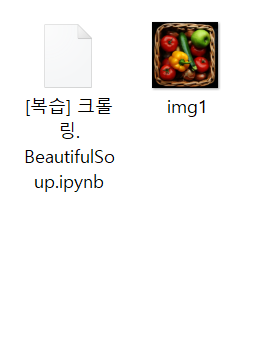

In [234]:
htmlFinish = BeautifulSoup(html8.text, 'lxml')
[_["src"] for _ in dom8.table.find_all("img")]

['../img/gifts/img1.jpg',
 '../img/gifts/img2.jpg',
 '../img/gifts/img3.jpg',
 '../img/gifts/img4.jpg',
 '../img/gifts/img6.jpg']

In [200]:
import re

In [235]:
re.findall('<img src="(.+?)">',html8.text) 
# 이렇게 하면 된다

['../img/gifts/logo.jpg" style="float:left;',
 '../img/gifts/img1.jpg',
 '../img/gifts/img2.jpg',
 '../img/gifts/img3.jpg',
 '../img/gifts/img4.jpg',
 '../img/gifts/img6.jpg']

# HTML 파서랑 CSS 파서로 다 끝난다

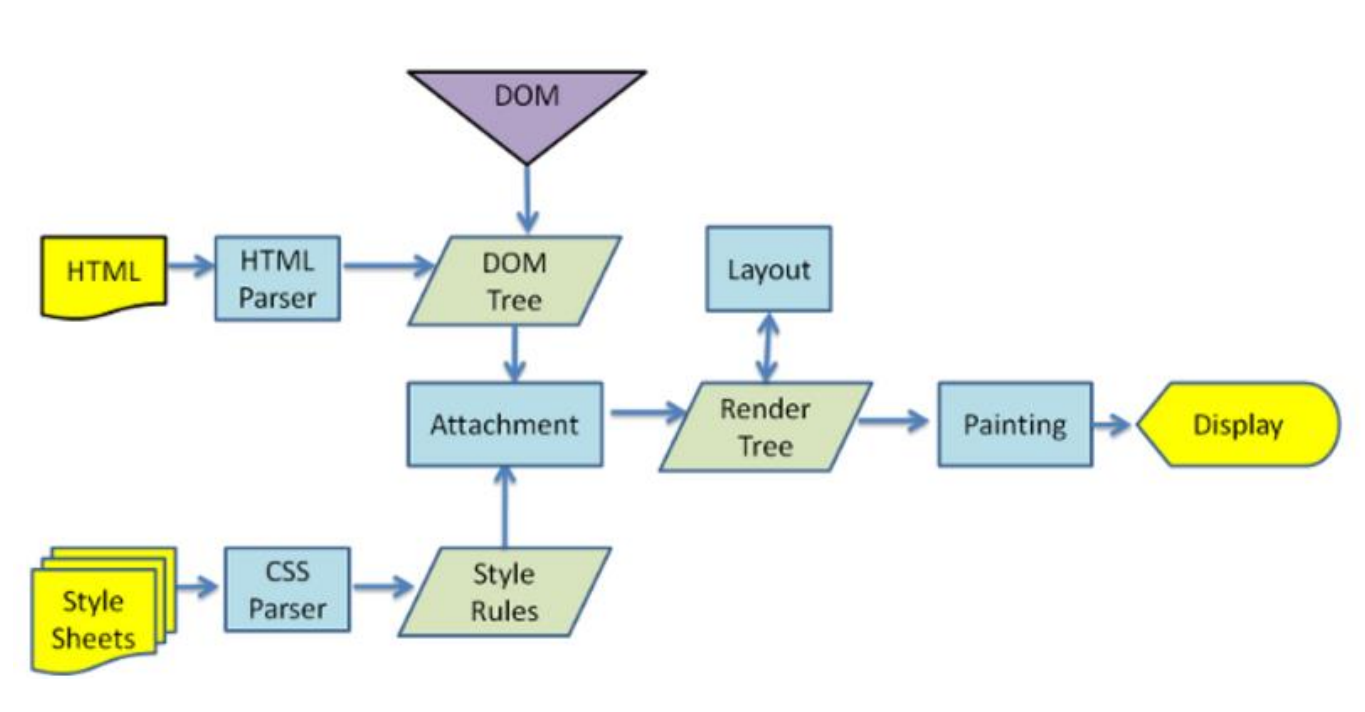

# selector

- 구조 : 웹 콘텐츠에 의미를 부여하고 구조를 형성 → HTML
- 표현 : 시각적인 디자인과 레이아웃 표현 → CSS
- 행위 : 모든 front-end의 브라우저 상호작용을 담당 → JavaScript

## css selector
: 선택자란 말 그대로 선택을 해주는 요소다. 이를 통해 특정 요소들을 선택하여 스타일을 적용할 수 있게 된다

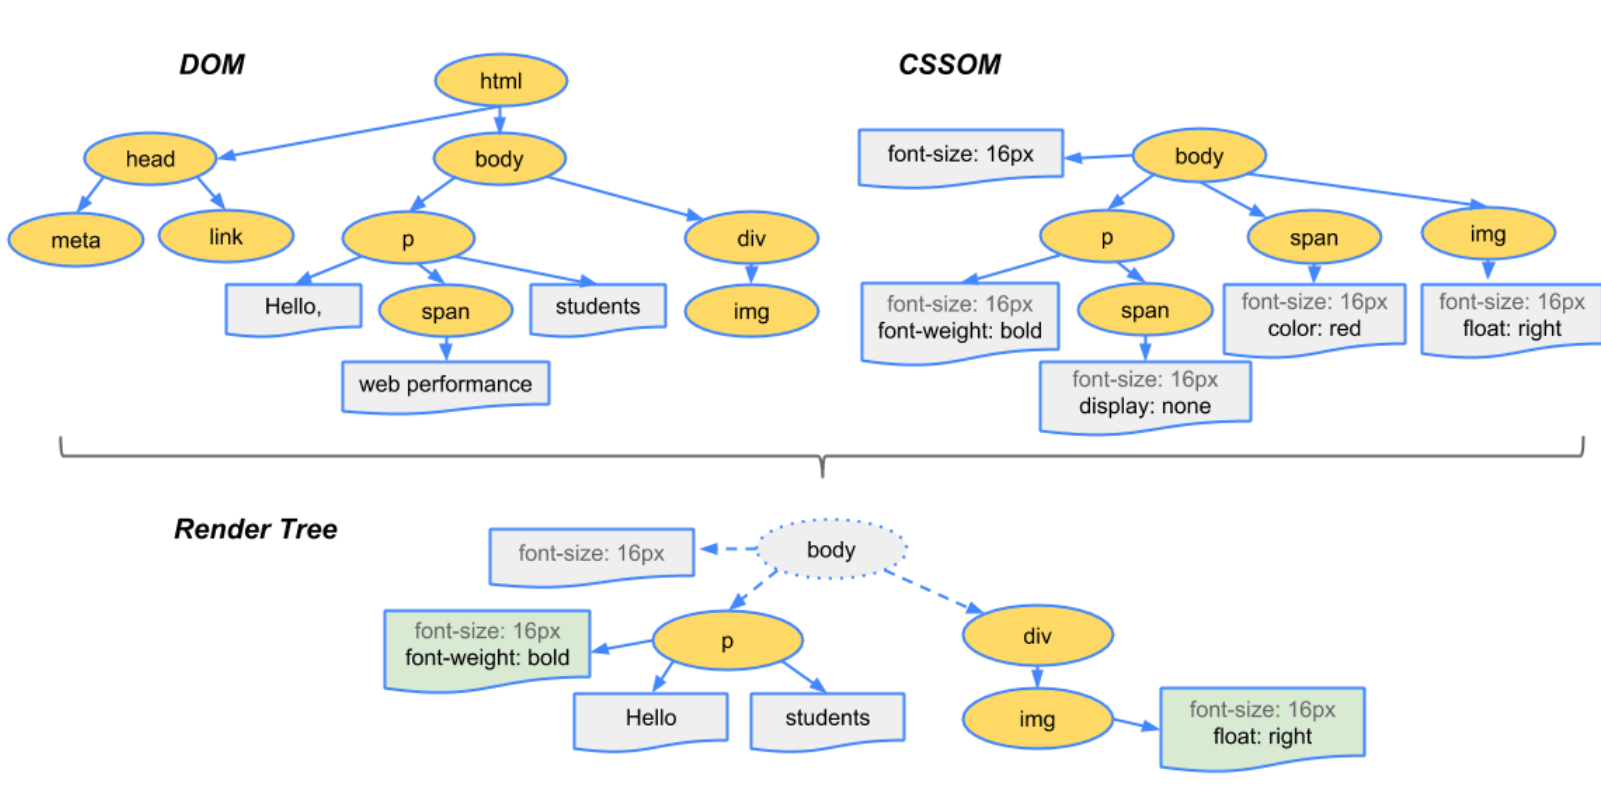

## - rule set
: HTML 페이지 안의 특정 요소들을 어떻게 rendering 할 것인 알려주는 CSS 문장

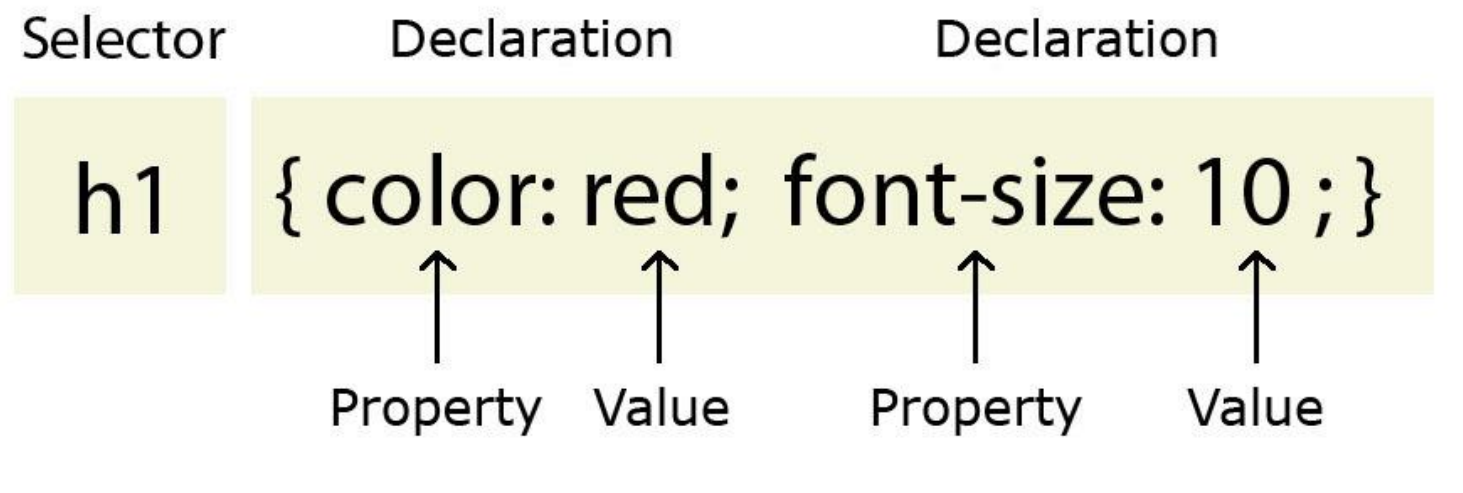

- 이런 문장들을 한군데에 모으면 스타일 시트를 이루게 되어 많은 수의 스타일 규칙들을 관리하기 쉬워진다

**선택자는 Rule Set 제일 앞에 있는데, rule set의 영향을 받는 html 페이지 안의 특정 element들을 선언해서 선언 블록 내용을 적용시켜 준다**

- id값이 있으면 이를 이용해서 찾는다
- 못 찾으면 class를 이용한다